In [659]:
%config IPCompleter.greedy=True
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [660]:
data_titanic=pd.read_csv("titanic.csv")
data_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


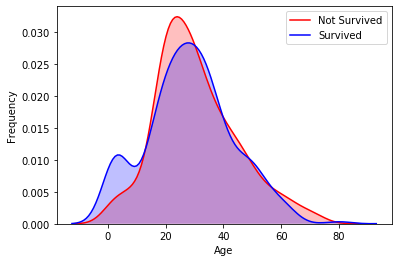

In [661]:
g = sns.kdeplot(data_titanic["Age"][(data_titanic["Survived"] == 0) & (data_titanic["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_titanic["Age"][(data_titanic["Survived"] == 1) & (data_titanic["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

In [662]:
data_title = [i.split(",")[1].split(".")[0].strip() for i in data_titanic["Name"]]
data_titanic["Title"] = pd.Series(data_title)
data_titanic["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

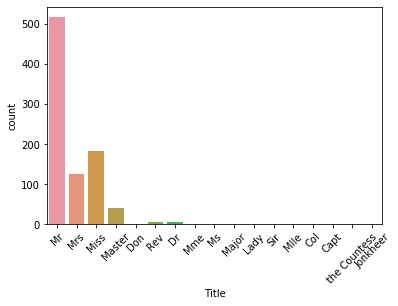

In [663]:
g = sns.countplot(x="Title",data=data_titanic)
g = plt.setp(g.get_xticklabels(), rotation=45) 

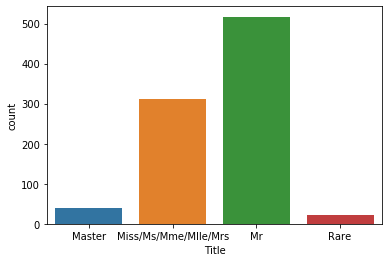

In [664]:
data_titanic["Title"] = data_titanic["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data_titanic["Title"] = data_titanic["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
data_titanic["Title"] = data_titanic["Title"].astype(int)
g = sns.countplot(data_titanic["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

In [665]:
data_titanic.drop("Cabin", axis=1, inplace=True)
data_titanic.drop("PassengerId", axis=1, inplace=True)
data_titanic.drop("Name",axis=1,inplace=True)
data_titanic.drop("Ticket", axis=1, inplace=True)
data_titanic.drop("Fare",axis=1,inplace=True)
data_titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,2


In [666]:
age_median=data_titanic['Age'].median()
print(age_median)

28.0


In [667]:
data_titanic.fillna({'Age':age_median,'Embarked':'S'},inplace=True)

In [668]:
data_titanic["SibSp"] = data_titanic["SibSp"].map({0:0, 1:1, 2:2 , 3:2, 4:3, 5:3, 8:3})
data_titanic["Parch"] = data_titanic["Parch"].map({0:0, 1:1, 2:2 , 3:2, 4:3, 5:3, 6:3})
data_titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,2


In [669]:
data_titanic[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.386364
3,3,0.100000


In [670]:
data_titanic[['Parch','Survived']].groupby('Parch',as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.505882
3,3,0.100000


In [671]:
data_titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,2


In [672]:
x=data_titanic.iloc[:,1:8].values
y=data_titanic.iloc[:,0].values
print(x)

[[3 'male' 22.0 ... 0 'S' 2]
 [1 'female' 38.0 ... 0 'C' 1]
 [3 'female' 26.0 ... 0 'S' 1]
 ...
 [3 'female' 28.0 ... 2 'S' 1]
 [1 'male' 26.0 ... 0 'C' 2]
 [3 'male' 32.0 ... 0 'Q' 2]]


In [673]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[1,3,4,5,6])],remainder="passthrough")
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 1.0 0.0 ... 0.0 3 22.0]
 [1.0 0.0 0.0 ... 0.0 1 38.0]
 [1.0 0.0 1.0 ... 0.0 3 26.0]
 ...
 [1.0 0.0 0.0 ... 0.0 3 28.0]
 [0.0 1.0 1.0 ... 0.0 1 26.0]
 [0.0 1.0 1.0 ... 0.0 3 32.0]]


In [674]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
x=norm.fit_transform(x)
print(x)

[[0.         1.         0.         ... 0.         1.         0.27117366]
 [1.         0.         0.         ... 0.         0.         0.4722292 ]
 [1.         0.         1.         ... 0.         1.         0.32143755]
 ...
 [1.         0.         0.         ... 0.         1.         0.34656949]
 [0.         1.         1.         ... 0.         0.         0.32143755]
 [0.         1.         1.         ... 0.         1.         0.39683338]]


In [675]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [676]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(x_train)
X_test=pca.transform(x_test)

explain_varience=pca.explained_variance_ratio_
print(explain_varience)

[3.85339898e-01 1.57458094e-01 1.25108797e-01 8.74159985e-02
 7.34901171e-02 4.72848828e-02 3.72799889e-02 2.87858675e-02
 2.41952571e-02 1.16438428e-02 9.75781218e-03 6.48579267e-03
 4.96294596e-03 7.90705764e-04 1.75910702e-31 2.45355116e-32
 1.11519158e-32 4.91540026e-33 3.73983296e-33]


In [677]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier(n_estimators=370,max_depth=6,random_state=0)
ranfor.fit(x_train,y_train)
y_pred=ranfor.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
acc=accuracy_score(y_test,y_pred)
print(acc)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[[97 13]
 [18 51]]
0.8268156424581006
